[[-0.53910918 -0.78933495 -0.06096717 ... -1.44770184  0.53605236
  -0.61999982]
 [ 0.05784851 -0.94867597  0.04301573 ...  0.12090262 -0.06893859
  -0.95740721]
 [-0.83758802  2.1744081  -0.47689877 ... -0.2712485  -0.21341405
   2.16361117]
 ...
 [ 1.84872156 -1.68164468  1.91470791 ...  0.43462351 -0.55353334
   1.15138899]
 [-0.83758802  0.10297479  0.25098152 ... -0.57189768 -1.1103658
  -0.28259243]
 [-0.53910918 -0.88493956 -0.26893297 ...  0.7614161   0.6173198
  -0.87305537]]
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.]
[[78 18]
 [24 34]]
              precisi

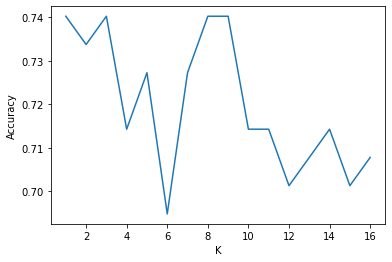

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('diabetes_dataset.csv')
index=np.arange(df.shape[0])
np.random.shuffle(index)
split=round(index.shape[0]*0.8)
f_part=index[0:split-1]
sec_part=index[split:]
f_data=df.iloc[f_part]
sec_data=df.iloc[sec_part]
arr=df.values
X=arr[:,0:8]
Y=arr[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

from sklearn.metrics import classification_report, confusion_matrix
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)
print(classification_report(y_test,y_pred))
print("Correct predictions ",c_matrix[0][0]+c_matrix[1][1],"/",np.sum(c_matrix))
def acc_func(c_matrix):
    return (c_matrix[0][0]+c_matrix[1][1])/(np.sum(c_matrix))
def KNN(k,X_train,X_test,y_train,y_test):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    c_matrix=confusion_matrix(y_test,y_pred)
    return acc_func(c_matrix)
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
k_accur=[]
for ki in k:
    accuracy=KNN(ki,X_train,X_test,y_train,y_test)
    print(ki,accuracy)
    k_accur.append(accuracy)
plt.plot(k,k_accur)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [2]:
#Lab3 

from sklearn.model_selection import KFold 
kf = KFold(n_splits=5,random_state=None) 
# X is the feature set and y is the target
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]

Train: [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398

No handles with labels found to put in legend.


0.5808080808080807


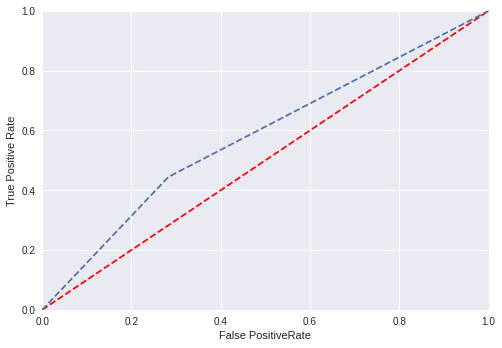

No handles with labels found to put in legend.


0.6823793490460157


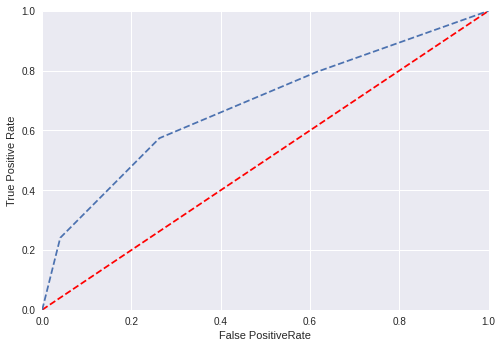

No handles with labels found to put in legend.


0.7174523007856342


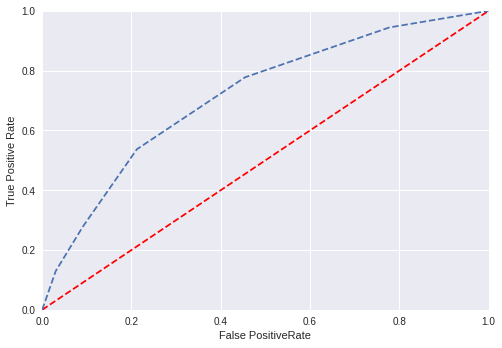

No handles with labels found to put in legend.


0.7627197904975682


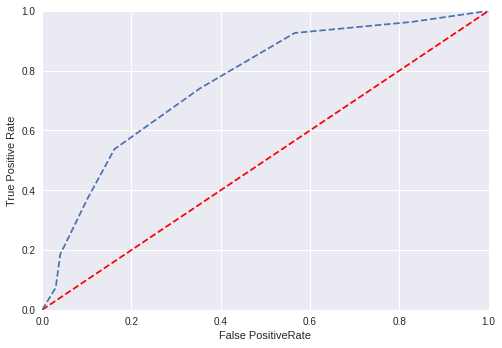

No handles with labels found to put in legend.


0.76440329218107


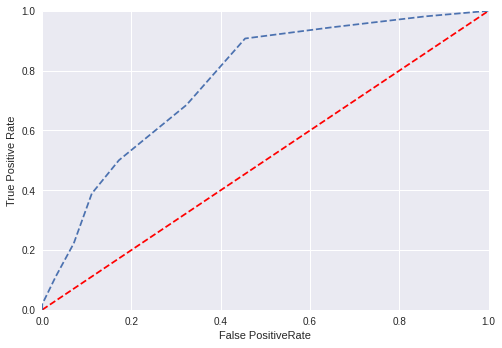

No handles with labels found to put in legend.


0.787037037037037


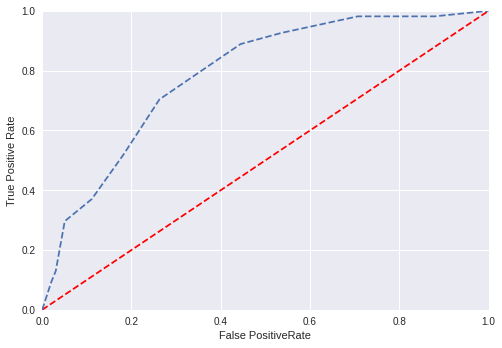

No handles with labels found to put in legend.


0.7974186307519642


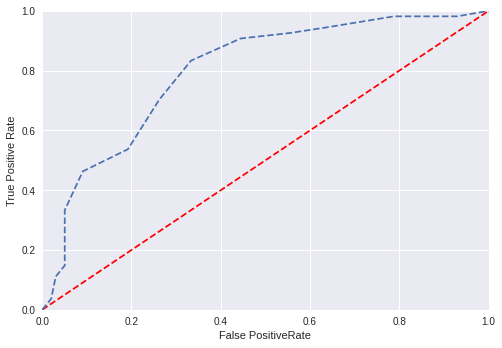

In [3]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
k = [1,3,5,7,9,11,15]
for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred =classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.style.use('seaborn')
    plt.legend(loc ='upper right')
    plt.plot([0,1],[0,1],'r--')
#     plt.show()
    plt.xlim([0,1])
    plt.ylim([0,1])# Set yaxis limits
    plt.ylabel('True Positive Rate')# ylabel
    plt.xlabel('False PositiveRate')
    plt.plot(fpr, tpr, linestyle='--', label = 'AUC = %0.2f' %roc_auc)# plot roc curves
    plt.show();

In [5]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,Y): 
    print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = Y[train_index], Y[test_index]

Train: [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398

In [ ]:
k = [1,3,5,7,9,11,15]
for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred =classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.style.use('seaborn')
    plt.legend(loc ='upper right')
    plt.plot([0,1],[0,1],'r--')
#     plt.show()
    plt.xlim([0,1])
    plt.ylim([0,1])# Set yaxis limits
    plt.ylabel('True Positive Rate')# ylabel
    plt.xlabel('False PositiveRate')
    plt.plot(fpr, tpr, linestyle='--', label = 'AUC = %0.2f' %roc_auc)# plot roc curves
    plt.show();

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X):
    print("Train:", train_index, "Validation:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [ ]:
k = [1,3,5,7,9,11,15]
for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred =classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.style.use('seaborn')
    plt.legend(loc ='upper right')
    plt.plot([0,1],[0,1],'r--')
#     plt.show()
    plt.xlim([0,1])
    plt.ylim([0,1])# Set yaxis limits
    plt.ylabel('True Positive Rate')# ylabel
    plt.xlabel('False PositiveRate')
    plt.plot(fpr, tpr, linestyle='--', label = 'AUC = %0.2f' %roc_auc)# plot roc curves
    plt.show();

In [ ]:
# b). For a particular value of k, the highest area under curve(roc_auc) value is for stratified Kfold. Hence, it's best.